In [1]:
using NeuralVerification
using Plots

In [2]:
# Create your network and visualize its output
l1 = NeuralVerification.Layer(reshape([4.085846895799728; 4.1588173348358115], (2, 1)), [0.8817063994604648, 0.2796385232288592], NeuralVerification.ReLU())
l2 = NeuralVerification.Layer([-4.334249191310455 -1.8483717148645762], [0.06296092967586442], NeuralVerification.ReLU())
nnet = NeuralVerification.Network([l1, l2])


Network(NeuralVerification.Layer[NeuralVerification.Layer{NeuralVerification.ReLU,Float64}([4.085846895799728; 4.1588173348358115], [0.8817063994604648, 0.2796385232288592], NeuralVerification.ReLU()), NeuralVerification.Layer{NeuralVerification.ReLU,Float64}([-4.334249191310455 -1.8483717148645762], [0.06296092967586442], NeuralVerification.ReLU())])

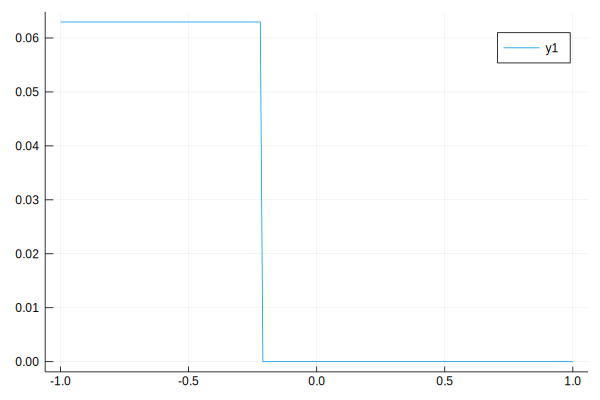

In [3]:
# Simple plot of outputs between x=-1 and x=1
outputs =[NeuralVerification.compute_output(nnet, [x])[1] for x=-1:0.01:1] 
plot(collect(-1:0.01:1), outputs)

In [4]:
# Example output above 0.05: -0.5 --> 0.063
NeuralVerification.compute_output(nnet, [-0.06723991479176115])

1-element Array{Float64,1}:
 0.0

In [5]:
# Try using Reluplex to check if the output is constrained to the set below 0.05 when x is between -1 and 1
solver = Reluplex()

input_set = NeuralVerification.Hyperrectangle(low = [-1.0], high = [1.0])
output_set = NeuralVerification.LinearConstraint([1.0], 0.05)
problem = Problem(nnet, input_set, output_set)

NeuralVerification.solve(solver, problem)

CounterExampleResult(:holds, Float64[])

In [6]:
# However, it still will find counterexamples that reach an output of 0 - say if I test if the output is always less than -0.1
output_set = NeuralVerification.LinearConstraint([1.0], -0.1)
problem = Problem(nnet, input_set, output_set)

NeuralVerification.solve(solver, problem)

CounterExampleResult(:violated, [-0.06723991479176115])